In [4]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'data\kickstarter_projects.csv'
kickstarter_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and a summary of the data
kickstarter_data.head(), kickstarter_data.info(), kickstarter_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


(           ID                                               Name   
 0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  \
 1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
 2  1703704063                                drawing for dollars   
 3      727286                       Offline Wikipedia iPhone app   
 4  1622952265                                         Pantshirts   
 
        Category   Subcategory        Country             Launched    Deadline   
 0       Fashion       Fashion  United States  2009-04-21 21:02:48  2009-05-31  \
 1  Film & Video        Shorts  United States  2009-04-23 00:07:53  2009-07-20   
 2           Art  Illustration  United States  2009-04-24 21:52:03  2009-05-03   
 3    Technology      Software  United States  2009-04-25 17:36:21  2009-07-14   
 4       Fashion       Fashion  United States  2009-04-27 14:10:39  2009-05-26   
 
     Goal  Pledged  Backers       State  
 0   1000      625       30      Failed  
 1  80

In [5]:
# Analyzing the distribution of the 'State' variable
state_distribution = kickstarter_data['State'].value_counts()

state_distribution


State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

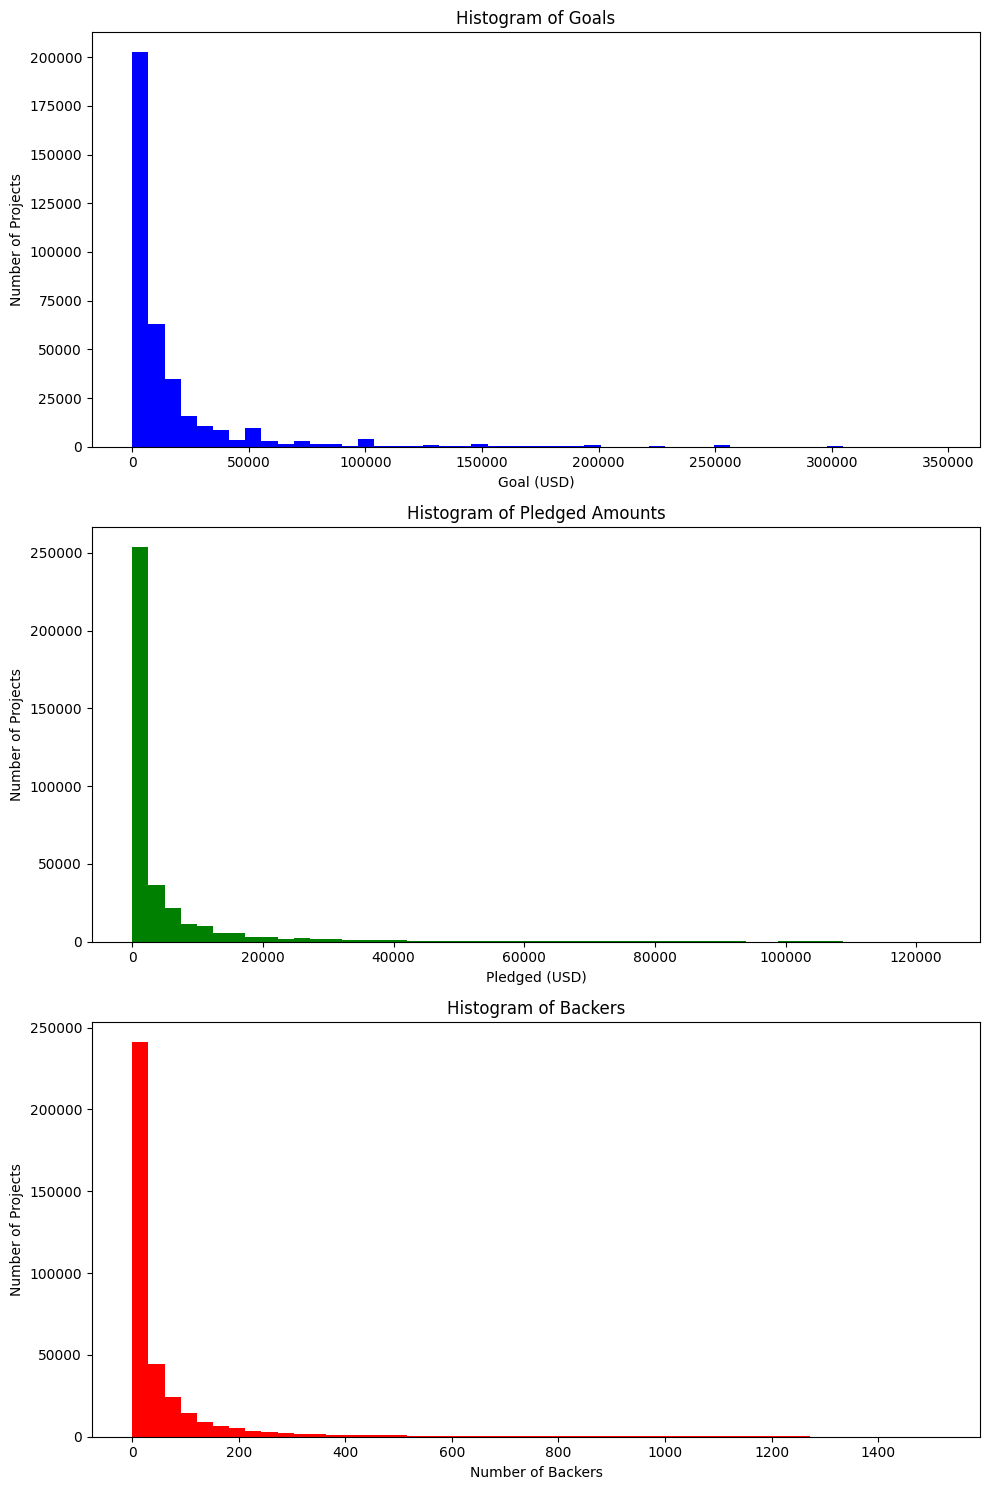

In [6]:
import matplotlib.pyplot as plt

# Plotting histograms for numerical features: 'Goal', 'Pledged', 'Backers'
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for 'Goal'
axes[0].hist(kickstarter_data['Goal'], bins=50, color='blue', range=[0, kickstarter_data['Goal'].quantile(0.99)])
axes[0].set_title('Histogram of Goals')
axes[0].set_xlabel('Goal (USD)')
axes[0].set_ylabel('Number of Projects')

# Plot for 'Pledged'
axes[1].hist(kickstarter_data['Pledged'], bins=50, color='green', range=[0, kickstarter_data['Pledged'].quantile(0.99)])
axes[1].set_title('Histogram of Pledged Amounts')
axes[1].set_xlabel('Pledged (USD)')
axes[1].set_ylabel('Number of Projects')

# Plot for 'Backers'
axes[2].hist(kickstarter_data['Backers'], bins=50, color='red', range=[0, kickstarter_data['Backers'].quantile(0.99)])
axes[2].set_title('Histogram of Backers')
axes[2].set_xlabel('Number of Backers')
axes[2].set_ylabel('Number of Projects')

plt.tight_layout()
plt.show()


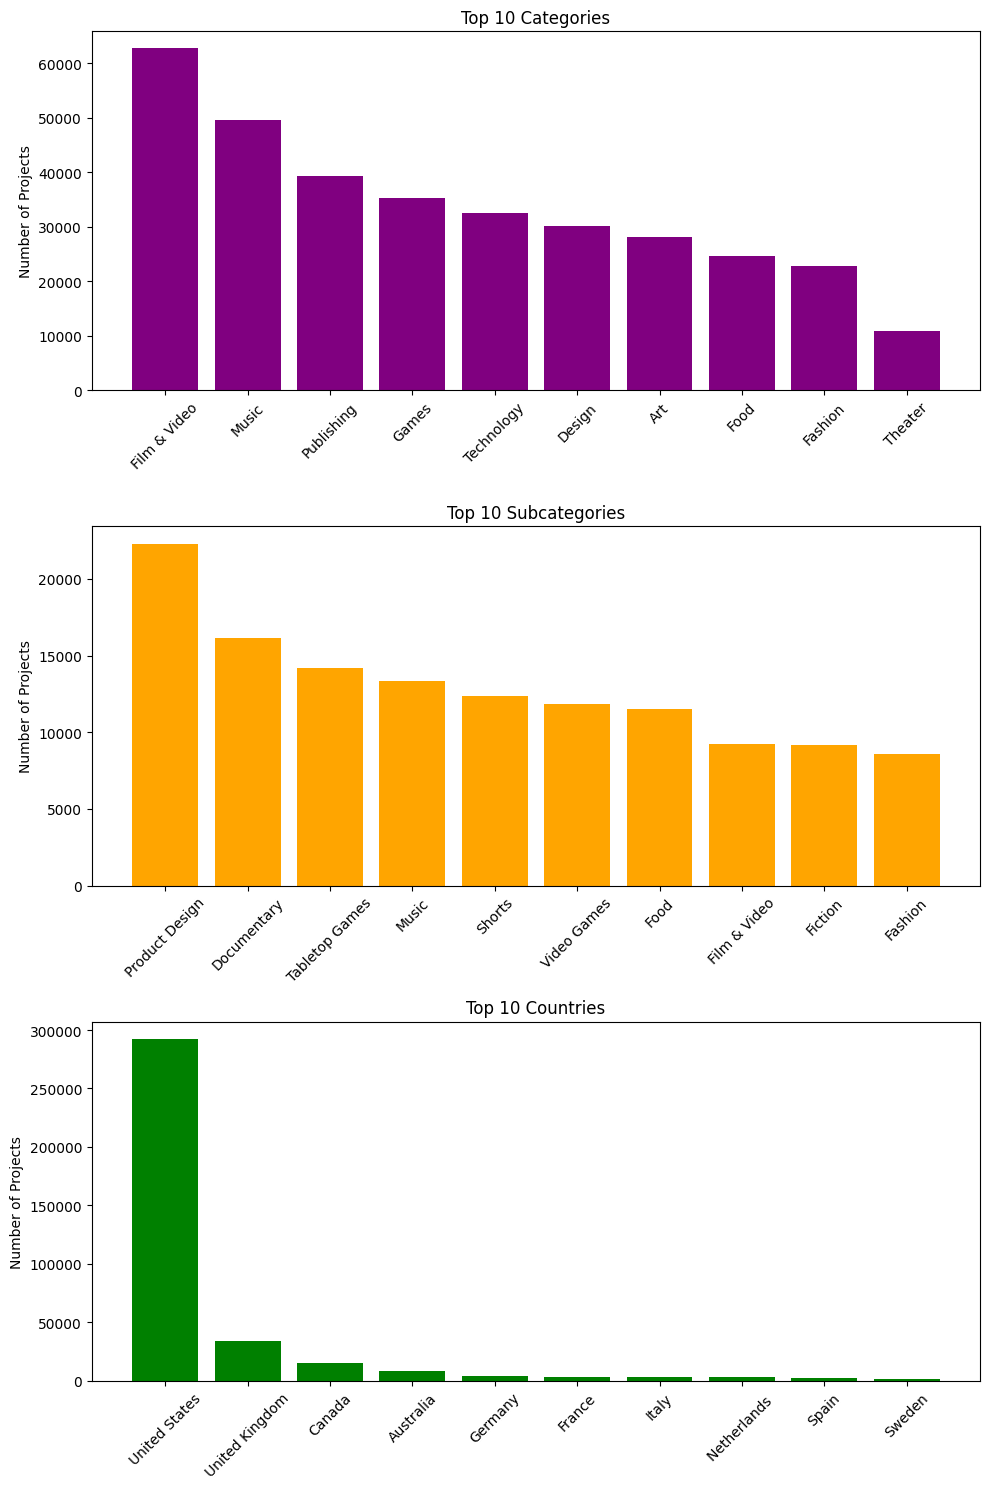

In [7]:
# Analyzing categorical distributions: 'Category', 'Subcategory', and 'Country'

# Plotting the distribution for 'Category'
category_counts = kickstarter_data['Category'].value_counts().nlargest(10)  # Top 10 categories
subcategory_counts = kickstarter_data['Subcategory'].value_counts().nlargest(10)  # Top 10 subcategories
country_counts = kickstarter_data['Country'].value_counts().nlargest(10)  # Top 10 countries

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for 'Category'
axes[0].bar(category_counts.index, category_counts.values, color='purple')
axes[0].set_title('Top 10 Categories')
axes[0].set_ylabel('Number of Projects')
axes[0].tick_params(axis='x', rotation=45)

# Plot for 'Subcategory'
axes[1].bar(subcategory_counts.index, subcategory_counts.values, color='orange')
axes[1].set_title('Top 10 Subcategories')
axes[1].set_ylabel('Number of Projects')
axes[1].tick_params(axis='x', rotation=45)

# Plot for 'Country'
axes[2].bar(country_counts.index, country_counts.values, color='green')
axes[2].set_title('Top 10 Countries')
axes[2].set_ylabel('Number of Projects')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [8]:
# Recalculating the exact number of projects in each 'State' variable
state_counts_exact = kickstarter_data['State'].value_counts()
state_counts_exact

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [9]:

# Calculating outliers in numerical features using the IQR method
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

outliers_goal = calculate_outliers(kickstarter_data['Goal'])
outliers_pledged = calculate_outliers(kickstarter_data['Pledged'])
outliers_backers = calculate_outliers(kickstarter_data['Backers'])

outliers_goal, outliers_pledged, outliers_backers


(44699, 50549, 44713)

In [10]:
# Checking for duplicate rows in the dataset
duplicate_rows = kickstarter_data.duplicated().sum()

duplicate_rows


0

In [11]:
# Checking for duplicate project names in the dataset
duplicate_project_names = kickstarter_data['Name'].duplicated().sum()

duplicate_project_names


2792

In [12]:
# Displaying some of the duplicate project names with their associated details
duplicate_names = kickstarter_data[kickstarter_data['Name'].duplicated(keep=False)]
duplicate_names_sorted = duplicate_names.sort_values(by='Name')[['Name', 'Category', 'Subcategory', 'Country', 'Launched', 'Deadline', 'Goal', 'Pledged', 'Backers', 'State']]

# Displaying the first few rows of the sorted duplicates
duplicate_names_sorted.head(10)


,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
123277,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,United States,2013-12-19 21:51:50,2014-02-09,6500,0,0,Canceled
124378,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,United States,2014-01-03 20:39:16,2014-03-01,6500,37,3,Failed
28543,"""A Fresh Start""",Film & Video,Shorts,United States,2011-08-28 21:27:52,2011-09-25,3000,3000,24,Successful
81934,"""A Fresh Start""",Film & Video,Documentary,United States,2013-01-26 03:51:47,2013-03-27,5000,1417,26,Failed
232766,"""American Sports Stories"" - An Athletic Quest",Film & Video,Shorts,United States,2015-06-27 02:02:00,2015-08-26,100000,100,1,Failed
338352,"""American Sports Stories"" - An Athletic Quest",Film & Video,Television,United States,2017-04-14 00:08:52,2017-05-14,100000,1,1,Failed
196404,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,United States,2015-01-27 19:30:43,2015-02-26,20000,7248,9,Canceled
159718,"""City of Mercy"" (Canceled)",Film & Video,Television,United States,2014-07-29 13:12:21,2014-08-28,15000,11260,7,Canceled
127715,"""Cut From the Illest Cloth"" - The Brand New Fu...",Music,Hip-Hop,United Kingdom,2014-02-02 16:00:57,2014-03-04,23478,377,7,Canceled
131480,"""Cut From the Illest Cloth"" - The Brand New Fu...",Music,Hip-Hop,United States,2014-03-01 19:32:15,2014-03-26,9000,1010,25,Canceled


In [13]:
# Investigating discrepancies such as test projects or improperly labeled projects (like "Canceled")

# Check for specific keywords that might indicate a test or non-serious project
test_keywords = ['test', 'Test', 'TEST']
contains_test = kickstarter_data[kickstarter_data['Name'].str.contains('|'.join(test_keywords))]

# Checking for canceled projects
canceled_projects = kickstarter_data[kickstarter_data['State'] == 'Canceled']

contains_test, canceled_projects.head()


(                ID                                               Name   
 524     1896639590                                    Test (Canceled)  \
 528       10997537  Resonance: Retro-Styled Adventure Game - conte...   
 738       14162879  LOVELAND Round 3: I'm Not Afraid (Mystery Test...   
 790     1307622956              The Greatest Instrument in the World.   
 1754    1324861710  Popcorn Spill. The Rise and Fall of "The Usher...   
 ...            ...                                                ...   
 373399  1547312467    Intelli+ : The Smartest iPhone Screen Protector   
 373982  1701340273  myFirst Fone - Smartest Wearable Smartphone wi...   
 374028  1953517346                      The Purrfect Pussycat Contest   
 374187  2116641072                               The Power of Protest   
 374385    25861899                                 Fidget Spin Tester   
 
             Category       Subcategory        Country             Launched   
 524              Art   Perform

In [14]:
# Counting the number of unique categories and subcategories in the dataset
num_categories = kickstarter_data['Category'].nunique()
num_subcategories = kickstarter_data['Subcategory'].nunique()

num_categories, num_subcategories


(15, 159)

# Data cleaningin and feature engineering

In [15]:


# Convert 'Launched' and 'Deadline' to datetime and calculate the duration
kickstarter_data['Deadline'] = pd.to_datetime(kickstarter_data['Deadline'])
kickstarter_data['Launched'] = pd.to_datetime(kickstarter_data['Launched'])
kickstarter_data['duration_days'] = (kickstarter_data['Deadline'] - kickstarter_data['Launched']).dt.days


In [16]:

# Calculate the top 10 subcategories based on frequency
top_subcategories = kickstarter_data['Subcategory'].value_counts().nlargest(10).index.tolist()
top_subcategories

['Product Design',
 'Documentary',
 'Tabletop Games',
 'Music',
 'Shorts',
 'Video Games',
 'Food',
 'Film & Video',
 'Fiction',
 'Fashion']

In [17]:

# Retain only the top subcategories in the dataset, map others to 'Other'
kickstarter_data['Subcategory'] = kickstarter_data['Subcategory'].apply(lambda x: x if x in top_subcategories else 'Other')


In [18]:
# Define the top five countries
top_countries = kickstarter_data['Country'].value_counts().nlargest(5).index.to_list()


# Map all countries not in the top five to 'Other'
kickstarter_data['Country'] = kickstarter_data['Country'].apply(lambda x: x if x in top_countries else 'Other')


In [19]:

# Clean and prepare the State column
kickstarter_data = kickstarter_data[kickstarter_data['State'] != 'Live']  # Remove live projects
kickstarter_data['State'] = kickstarter_data['State'].apply(lambda x: 1 if x == 'Successful' else 0)  # Encode State as binary


In [20]:

# Apply one-hot encoding to the categorical variables
kickstarter_data = pd.get_dummies(kickstarter_data, columns=['Category', 'Subcategory', 'Country'])


In [21]:
# Add the 'name_counter' column using .loc[] to avoid the SettingWithCopyWarning
kickstarter_data.loc[:, 'name_counter'] = kickstarter_data.groupby('Name')['Name'].transform('count')


In [22]:

# deleting the rows
exclude_names = ['Test (Canceled)', 'Canceled (Canceled)', 'Deleted (Canceled)']
kickstarter_data = kickstarter_data[~kickstarter_data['Name'].isin(exclude_names)]

In [23]:


# Displaying the transformed data
transformed_data_sample = kickstarter_data.head()
transformed_data_sample


,ID,Name,Launched,Deadline,Goal,Pledged,Backers,State,duration_days,Category_Art,...,Subcategory_Shorts,Subcategory_Tabletop Games,Subcategory_Video Games,Country_Australia,Country_Canada,Country_Germany,Country_Other,Country_United Kingdom,Country_United States,name_counter
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,39,False,...,False,False,False,False,False,False,False,False,True,1
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,87,False,...,True,False,False,False,False,False,False,False,True,1
2,1703704063,drawing for dollars,2009-04-24 21:52:03,2009-05-03,20,35,3,1,8,True,...,False,False,False,False,False,False,False,False,True,1
3,727286,Offline Wikipedia iPhone app,2009-04-25 17:36:21,2009-07-14,99,145,25,1,79,False,...,False,False,False,False,False,False,False,False,True,1
4,1622952265,Pantshirts,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,28,False,...,False,False,False,False,False,False,False,False,True,1


In [24]:
print(kickstarter_data.shape)

(372034, 42)


## Testing Assumptions and Building Baseline Model

In [25]:


# Assumption 1: Treat duplicates as unique campaigns if all have failed
def handle_assumption_1(data):
    # Identify duplicate names
    duplicates = data[data.duplicated(subset='Name', keep=False)]
    
    # Filter duplicates where all campaigns failed
    failed_duplicates = duplicates.groupby('Name').filter(lambda x: x['State'].sum() == 0)
    
    # Combine non-duplicates with the filtered duplicates
    non_duplicates = data.drop_duplicates(subset='Name', keep=False)
    result = pd.concat([non_duplicates, failed_duplicates])
    
    return result

# Assumption 2: Aggregate duplicates (mean for numerical features, max for binary)
def handle_assumption_2_adjusted(data):
    current_columns = data.columns.tolist()
    columns_to_aggregate = [
        'Goal', 'duration_days', 'Pledged', 'Backers', 'State'
    ] + [col for col in current_columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country') or col == 'name_counter']

    aggregated_data = data.groupby('Name').agg({col: 'mean' if col != 'State' else 'max' for col in columns_to_aggregate}).reset_index()
    return aggregated_data

# Assumption 3: Take the most recent campaign
def handle_assumption_3(data):
    return data.sort_values(by='Launched', ascending=False).drop_duplicates(subset='Name', keep='first')


In [26]:

# Apply the assumptions
data_assumption_1 = handle_assumption_1(kickstarter_data)
data_assumption_2_adjusted = handle_assumption_2_adjusted(kickstarter_data)
data_assumption_3 = handle_assumption_3(kickstarter_data)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Prepare and train the logistic regression model
def prepare_and_train(data, feature_to_use):
    X = data[['Goal', 'duration_days', feature_to_use] + [col for col in data.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
    y = data['State']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, matrix


In [28]:

# Test models for each assumption
accuracy_pledged_1, report_pledged_1, matrix_pledged_1 = prepare_and_train(data_assumption_1, 'Pledged')
accuracy_backers_1, report_backers_1, matrix_backers_1 = prepare_and_train(data_assumption_1, 'Backers')


In [29]:

accuracy_pledged_2, report_pledged_2, matrix_pledged_2 = prepare_and_train(data_assumption_2_adjusted, 'Pledged')
accuracy_backers_2, report_backers_2, matrix_backers_2 = prepare_and_train(data_assumption_2_adjusted, 'Backers')


In [30]:

accuracy_pledged_3, report_pledged_3, matrix_pledged_3 = prepare_and_train(data_assumption_3, 'Pledged')
accuracy_backers_3, report_backers_3, matrix_backers_3 = prepare_and_train(data_assumption_3, 'Backers')


In [31]:

print("Assumption 1 - Pledged:", accuracy_pledged_1)
print(report_pledged_1)
print("Assumption 1 - Backers:", accuracy_backers_1)
print(report_backers_1)

print("Assumption 2 - Pledged:", accuracy_pledged_2)
print(report_pledged_2)
print("Assumption 2 - Backers:", accuracy_backers_2)
print(report_backers_2)

print("Assumption 3 - Pledged:", accuracy_pledged_3)
print(report_pledged_3)
print("Assumption 3 - Backers:", accuracy_backers_3)
print(report_backers_3)


Assumption 1 - Pledged: 0.8866024044189321
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     59342
           1       0.93      0.74      0.82     32988

    accuracy                           0.89     92330
   macro avg       0.90      0.85      0.87     92330
weighted avg       0.89      0.89      0.88     92330

Assumption 1 - Backers: 0.8747752626448608
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     59342
           1       0.91      0.72      0.80     32988

    accuracy                           0.87     92330
   macro avg       0.89      0.84      0.86     92330
weighted avg       0.88      0.87      0.87     92330

Assumption 2 - Pledged: 0.8906231383295603
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     58803
           1       0.93      0.76      0.83     33520

    accuracy                           0.89     92323

In [32]:
def prepare_and_train(data, feature_to_use):
    X = data[['Goal', 'duration_days', feature_to_use] + [col for col in data.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
    y = data['State']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, matrix

# Test models for Assumption 2 and 3 with Pledged
accuracy_pledged_2, report_pledged_2, matrix_pledged_2 = prepare_and_train(data_assumption_2_adjusted, 'Pledged')
accuracy_pledged_3, report_pledged_3, matrix_pledged_3 = prepare_and_train(data_assumption_3, 'Pledged')

# Print results
print("Assumption 2 - Pledged:", accuracy_pledged_2)
print(report_pledged_2)

print("Assumption 3 - Pledged:", accuracy_pledged_3)
print(report_pledged_3)

Assumption 2 - Pledged: 0.8906231383295603
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     58803
           1       0.93      0.76      0.83     33520

    accuracy                           0.89     92323
   macro avg       0.90      0.86      0.88     92323
weighted avg       0.89      0.89      0.89     92323

Assumption 3 - Pledged: 0.8898324361210099
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     58911
           1       0.93      0.75      0.83     33412

    accuracy                           0.89     92323
   macro avg       0.90      0.86      0.88     92323
weighted avg       0.89      0.89      0.89     92323



In [33]:
from sklearn.preprocessing import MinMaxScaler
# Prepare and train the logistic regression model with MinMaxScaler
def prepare_and_train_minmax(data, feature_to_use):
    X = data[['Goal', 'duration_days', feature_to_use] + [col for col in data.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
    y = data['State']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, matrix

# Test the model with MinMaxScaler under Assumption 3 with Pledged
accuracy_pledged_3_minmax, report_pledged_3_minmax, matrix_pledged_3_minmax = prepare_and_train_minmax(data_assumption_3, 'Pledged')

# Print results
print("Assumption 3 - Pledged with MinMaxScaler:", accuracy_pledged_3_minmax)
print(report_pledged_3_minmax)


Assumption 3 - Pledged with MinMaxScaler: 0.672042719582336
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     58911
           1       0.58      0.33      0.42     33412

    accuracy                           0.67     92323
   macro avg       0.64      0.60      0.60     92323
weighted avg       0.65      0.67      0.65     92323



In [34]:
# Evaluate model on the training data
def evaluate_on_training(data, feature_to_use):
    X = data[['Goal', 'duration_days', feature_to_use] + [col for col in data.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
    y = data['State']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Train logistic regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # Predictions on training data
    y_train_pred = model.predict(X_train_scaled)
    
    # Evaluate on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    report_train = classification_report(y_train, y_train_pred)
    
    return accuracy_train, report_train

# Evaluate model on training data using Assumption 3
accuracy_train, report_train = evaluate_on_training(data_assumption_3, 'Pledged')

# Print results
print("Training Data - Pledged:", accuracy_train)
print(report_train)


Training Data - Pledged: 0.8910487854192543
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    177352
           1       0.93      0.76      0.83     99616

    accuracy                           0.89    276968
   macro avg       0.90      0.86      0.88    276968
weighted avg       0.89      0.89      0.89    276968



In [35]:

# Prepare and train the logistic regression model
def prepare_and_train(data, feature_to_use):
    X = data[['Goal', 'duration_days', feature_to_use] + [col for col in data.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
    y = data['State']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train logistic regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # Evaluate on test data
    y_test_pred = model.predict(X_test_scaled)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    report_test = classification_report(y_test, y_test_pred)
    
    return accuracy_test, report_test, y_test, y_test_pred

# Evaluate model on the test data using Assumption 3
accuracy_test, report_test, y_test, y_test_pred = prepare_and_train(data_assumption_3, 'Pledged')

# Print results
print("Test Data - Pledged:", accuracy_test)
print(report_test)

Test Data - Pledged: 0.8898324361210099
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     58911
           1       0.93      0.75      0.83     33412

    accuracy                           0.89     92323
   macro avg       0.90      0.86      0.88     92323
weighted avg       0.89      0.89      0.89     92323



In [37]:


# Assuming X and y are your features and target
kickstarter_data = pd.concat([X, y], axis=1)

# Check correlation with the target
correlations = kickstarter_data.corr()['State'].sort_values(ascending=False)
print(correlations)


State                         1.000000
Pledged                       0.110696
Category_Music                0.106284
Category_Theater              0.086607
Subcategory_Tabletop Games    0.083453
Subcategory_Shorts            0.069207
Category_Comics               0.066525
Country_United States         0.062978
Category_Dance                0.055242
Subcategory_Music             0.047725
Category_Art                  0.030706
Category_Film & Video         0.016572
Subcategory_Documentary       0.003714
Country_United Kingdom        0.001027
Subcategory_Product Design    0.000871
Category_Games                0.000036
Category_Design              -0.002914
Subcategory_Film & Video     -0.008567
Category_Photography         -0.018865
Subcategory_Other            -0.023255
Goal                         -0.023573
Subcategory_Food             -0.026734
Country_Germany              -0.028833
Country_Australia            -0.030915
Category_Publishing          -0.031809
Country_Canada           

In [38]:
# Prepare and train the logistic regression model without 'Pledged'
def prepare_and_train(data):
    # Exclude 'Pledged' from the features
    X = data[['Goal', 'duration_days'] + 
             [col for col in data.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
    y = data['State']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train logistic regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # Evaluate on test data
    y_test_pred = model.predict(X_test_scaled)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    report_test = classification_report(y_test, y_test_pred)
    
    return accuracy_test, report_test, y_test, y_test_pred

# Evaluate model on the test data without 'Pledged'
accuracy_test, report_test, y_test, y_test_pred = prepare_and_train(data_assumption_3)

# Print results
print("Test Data without 'Pledged':", accuracy_test)
print(report_test)


Test Data without 'Pledged': 0.6753138437875719
              precision    recall  f1-score   support

           0       0.70      0.87      0.77     58911
           1       0.59      0.34      0.43     33412

    accuracy                           0.68     92323
   macro avg       0.64      0.60      0.60     92323
weighted avg       0.66      0.68      0.65     92323



 ## Hypertuning Base Line Model

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Prepare the data
X = data_assumption_3[['Goal', 'duration_days', 'Pledged'] + 
                      [col for col in data_assumption_3.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
y = data_assumption_3['State']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Define the parameter grid 
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}


# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on the test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Data Accuracy:", accuracy_test)
print(report_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: 

## Trainining on XGBoost

In [ ]:
import xgboost as xgb

# Prepare the data
X = data_assumption_3[['Goal', 'duration_days', 'Pledged'] + 
                      [col for col in data_assumption_3.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
y = data_assumption_3['State']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train_scaled)

# Predict on the test set
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)

# Evaluate the model on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

# Print results
print("Training Data Accuracy - XGBoost:", accuracy_train)
print(report_train)

print("Test Data Accuracy - XGBoost:", accuracy_test)
print(report_test)


c:\Users\Kripa\desktop\SPICED\ml-project-kickstarter-main\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Data Accuracy - XGBoost: 0.9967866323907455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177352
           1       0.99      1.00      1.00     99616

    accuracy                           1.00    276968
   macro avg       1.00      1.00      1.00    276968
weighted avg       1.00      1.00      1.00    276968

Test Data Accuracy - XGBoost: 0.9960789835685582
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     58911
           1       0.99      1.00      0.99     33412

    accuracy                           1.00     92323
   macro avg       0.99      1.00      1.00     92323
weighted avg       1.00      1.00      1.00     92323



In [40]:
import xgboost as xgb

# Prepare the data
X = data_assumption_3[['Goal', 'duration_days'] + 
                      [col for col in data_assumption_3.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
y = data_assumption_3['State']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = xgb_model.predict(X_train_scaled)

# Predict on the test set
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)

# Evaluate the model on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

# Print results
print("Training Data Accuracy - XGBoost:", accuracy_train)
print(report_train)

print("Test Data Accuracy - XGBoost:", accuracy_test)
print(report_test)


c:\Users\Kripa\desktop\SPICED\ml-project-kickstarter-main\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Data Accuracy - XGBoost: 0.7008318650530025
              precision    recall  f1-score   support

           0       0.73      0.86      0.79    177352
           1       0.63      0.42      0.50     99616

    accuracy                           0.70    276968
   macro avg       0.68      0.64      0.64    276968
weighted avg       0.69      0.70      0.68    276968

Test Data Accuracy - XGBoost: 0.6904563326581675
              precision    recall  f1-score   support

           0       0.72      0.85      0.78     58911
           1       0.61      0.41      0.49     33412

    accuracy                           0.69     92323
   macro avg       0.66      0.63      0.63     92323
weighted avg       0.68      0.69      0.67     92323



In [ ]:
from sklearn.model_selection import cross_val_score

# Prepare the data
X = data_assumption_3[['Goal', 'duration_days', 'Pledged'] + 
                      [col for col in data_assumption_3.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
y = data_assumption_3['State']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())



Cross-Validation Scores: [0.99386669 0.99597877 0.99482791 0.99645265 0.99817217]
Mean Cross-Validation Score: 0.995859639127266


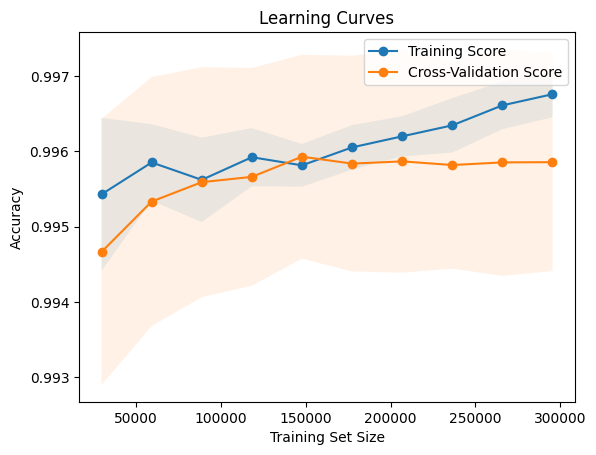

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc="best")
plt.show()


## Feature Importance 

<Figure size 1000x800 with 0 Axes>

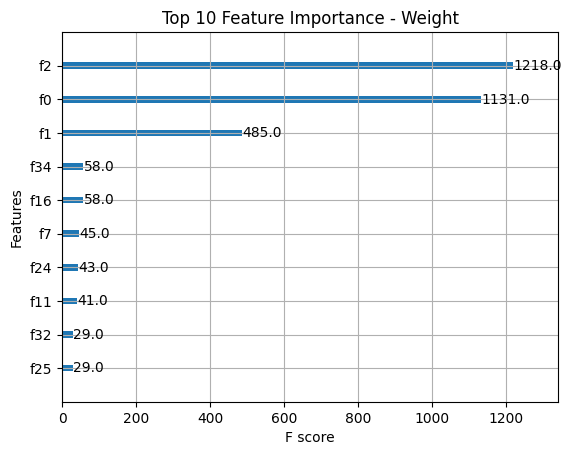

<Figure size 1000x800 with 0 Axes>

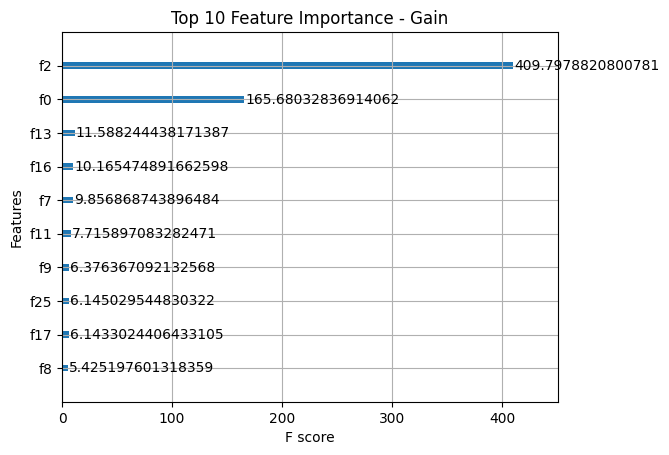

<Figure size 1000x800 with 0 Axes>

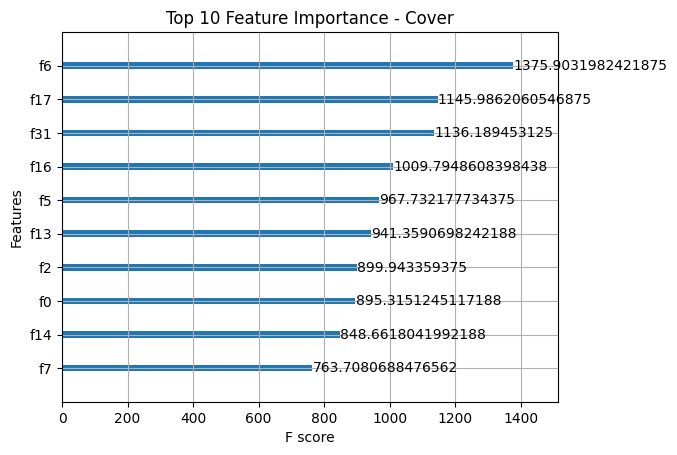

In [ ]:
# Prepare the data
X = data_assumption_3[['Goal', 'duration_days', 'Pledged'] + 
                      [col for col in data_assumption_3.columns if col.startswith('Category') or col.startswith('Subcategory') or col.startswith('Country')]]
y = data_assumption_3['State']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Feature Importance - Weight')
plt.show()

plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title('Top 10 Feature Importance - Gain')
plt.show()

plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, importance_type='cover', max_num_features=10)
plt.title('Top 10 Feature Importance - Cover')
plt.show()


In [ ]:


# Assuming X_train_scaled and the original features (X) are available from earlier steps
# Re-train the model if needed
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Map feature indices to their names
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))


c:\Users\Kripa\desktop\SPICED\ml-project-kickstarter-main\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                       Feature  Importance
2                      Pledged    0.602356
0                         Goal    0.243531
13              Category_Music    0.017033
16         Category_Technology    0.014942
7              Category_Design    0.014488
11              Category_Games    0.011341
9        Category_Film & Video    0.009373
25  Subcategory_Product Design    0.009032
17            Category_Theater    0.009030
8             Category_Fashion    0.007974
